In [1]:
import pandas as pd
df=pd.read_csv("C://Users//sinci//Downloads//product.csv")

In [3]:
df.head()

,Product,North,South,East,West
0,Product1,120,130,115,125
1,Product2,150,160,155,145
2,Product3,90,95,85,100
3,Product4,200,210,195,205
4,Product5,85,80,75,95


In [5]:
from scipy.stats import zscore 
df_zscore=df.select_dtypes(include=['number']).apply(zscore)
df_zscore.head()

,North,South,East,West
0,-0.371494,-0.378557,-0.615947,-0.598754
1,-0.215075,-0.180186,0.036712,-0.230290
2,-0.527912,-0.609989,-1.105441,-1.059334
3,0.045622,0.150431,0.689371,0.875102
4,-0.553982,-0.709174,-1.268606,-1.151450


In [19]:
numeric_cols = df.select_dtypes(include=np.number).columns

z_scores = np.abs((df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std())

df['z_score'] = z_scores.max(axis=1)

outliers = df[df['z_score'] > 3]

print("Outliers")
print(outliers)

Outliers
    Product  North  South  East  West   z_score
5  Product6   1000    310   305   295  4.110007
7  Product8    250    800   255   245  3.949124


In [23]:
numeric_cols = df.select_dtypes(include=np.number).columns

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)

outliers = df[(df[numeric_cols] < lower) | (df[numeric_cols] > upper)].any(axis=1)

outliers_df = df[outliers]

print("Outliers: ")
print(outliers_df)

Outliers: 
    Product  North  South  East  West   z_score
5  Product6   1000    310   305   295  4.110007
7  Product8    250    800   255   245  3.949124


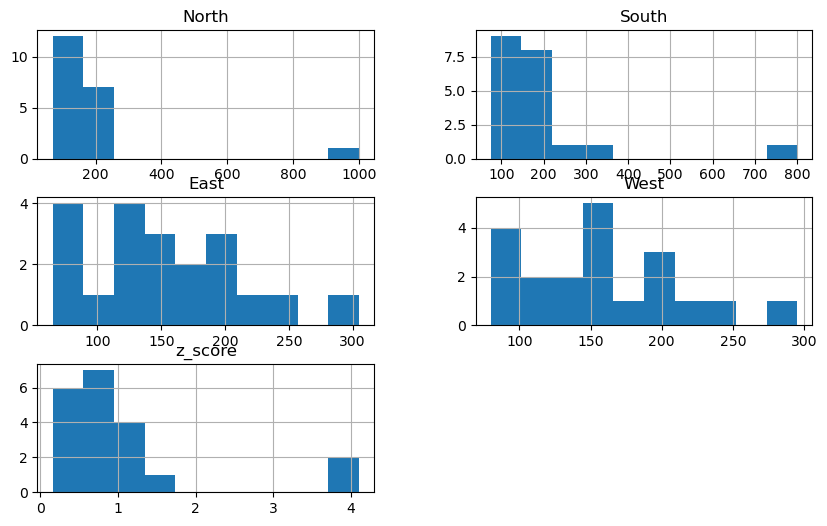

ValueError: Cannot set a DataFrame with multiple columns to the single column no_outliers

In [29]:
import matplotlib.pyplot as plt

df[numeric_cols].hist(figsize=(10, 6))
plt.show()

df['no_outliers'] = df[~((df[numeric_cols] < lower) | (df[numeric_cols] > upper)).any(axis=1)]

df['no_outliers'][numeric_cols].hist(figsize=(10, 6))
plt.show()